# Import dependencies and adata file

In [31]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [70]:
# for prettier and clearer figures
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.set_figure_params(dpi=100, color_map = 'viridis')
sc.set_figure_params(scanpy=True, fontsize=20,figsize=(6,6))

scanpy==1.6.0 anndata==0.7.5 umap==0.4.6 numpy==1.19.4 scipy==1.6.0 pandas==1.2.0 scikit-learn==0.24.0 statsmodels==0.12.1 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [2]:
pathToData = '/Users/m.blotenburg/Documents/Projects/TCHIC/data/rep2/20210215_OUD5651_K27me3K4me3_day5_20201023fixed/'

In [3]:
adata = sc.read(pathToData + '/dataframes/20210305_TCHIC_rep2_adata_trans_chic_raw_normalised.h5ad' )

In [4]:
adata

AnnData object with n_obs × n_vars = 4396 × 27312
    obs: 'n_counts', 'n_genes', 'percent_mito', 'batch', 'day', 'replicates', 'mark', 'umap_density_mark', 'leiden', 'louvain', 'celltype', 'cellnames', 'bc', 'cellname'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'celltype_colors', 'day_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'louvain', 'louvain_colors', 'mark_colors', 'neighbors', 'pca', 'rank_genes_groups', 'replicates_colors', 'umap', 'umap_density_mark_params'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'k27_norm', 'k27_raw', 'k4_norm', 'k4_raw', 'matrix', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [5]:
results_file = pathToData + '/dataframes/20210307_TCHIC_rep2_adata_findingMarkerGenes_trans_chic.h5ad' 

# Some plots to visualise our dataset

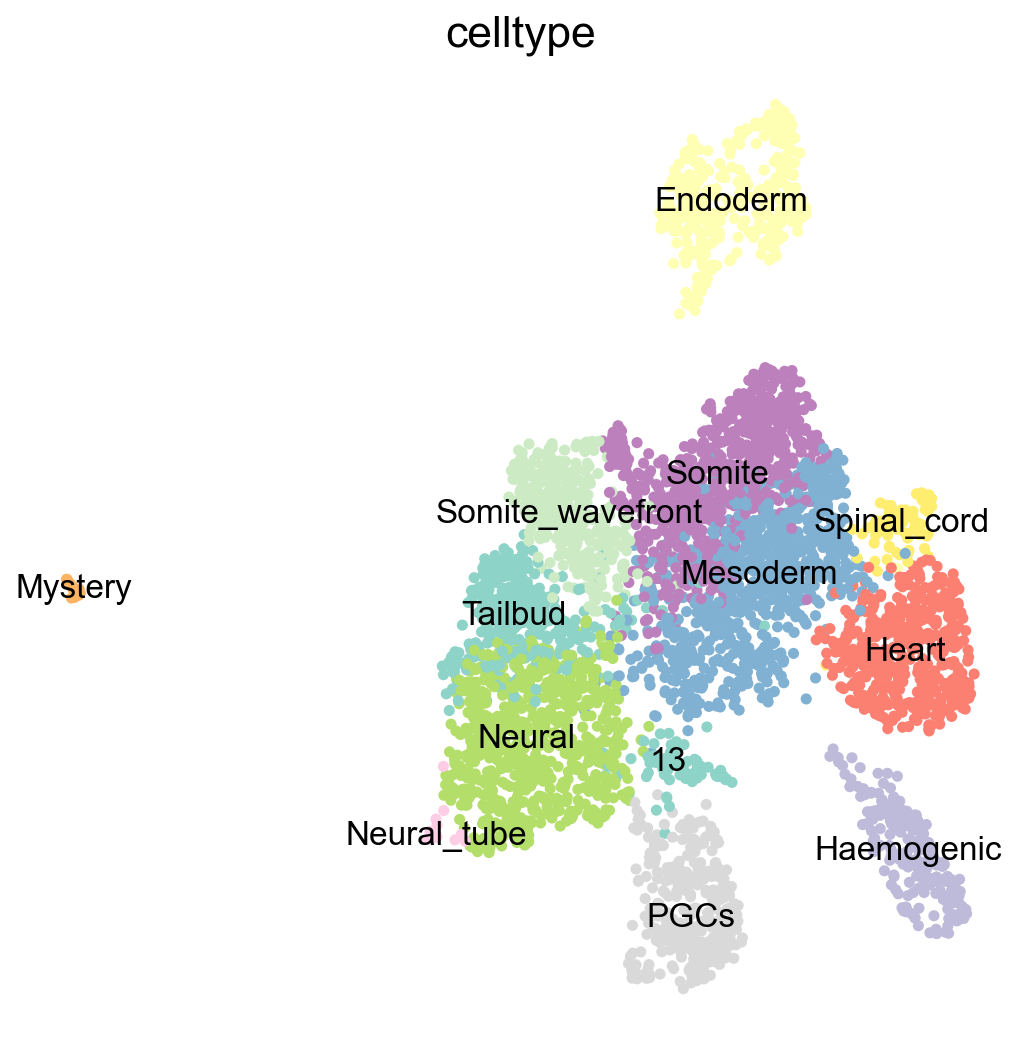

In [69]:
fig, ax = plt.subplots(figsize=(8,8))
sc.pl.umap(adata, color = "celltype", legend_loc = 'on data', legend_fontweight="normal", legend_fontsize=15,
           frameon=False, ax=ax, size = 100)

In [22]:
layers = ['unspliced','spliced','k4_raw','k4_norm','k27_raw','k27_norm']

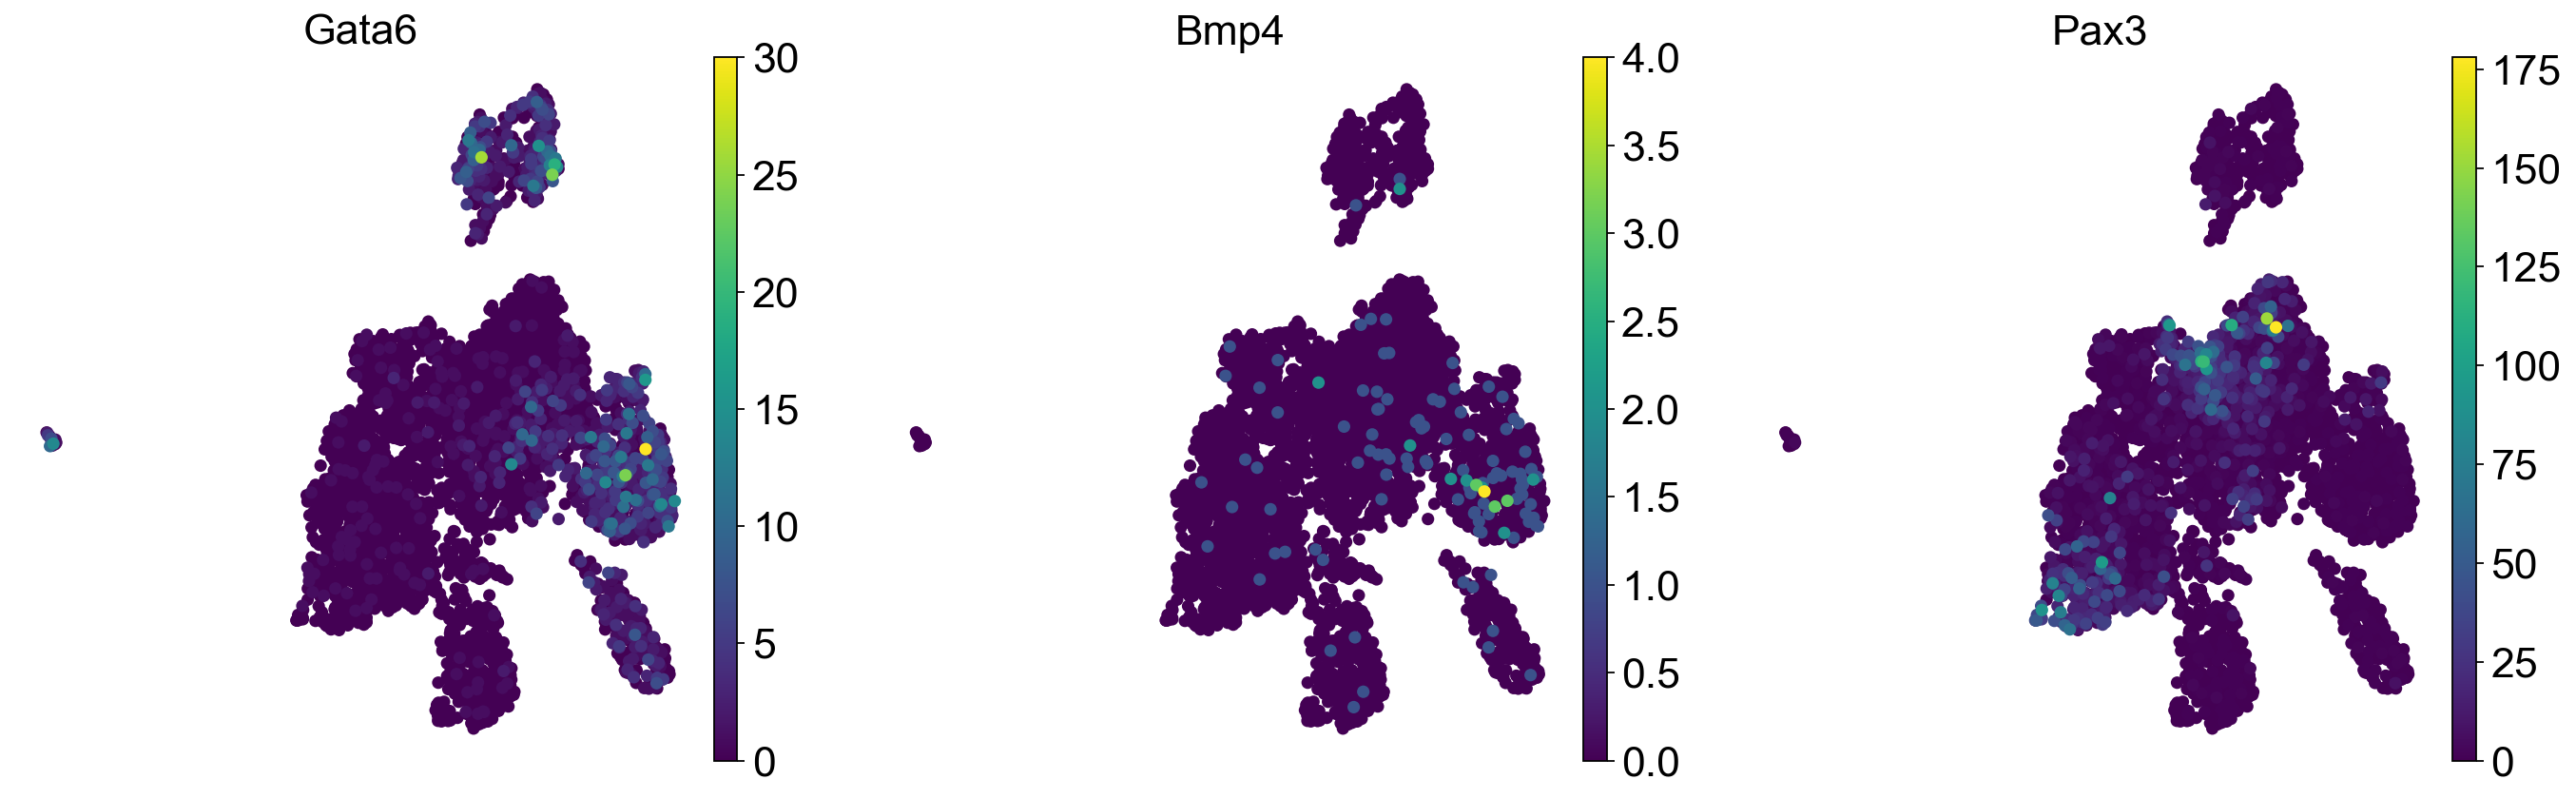

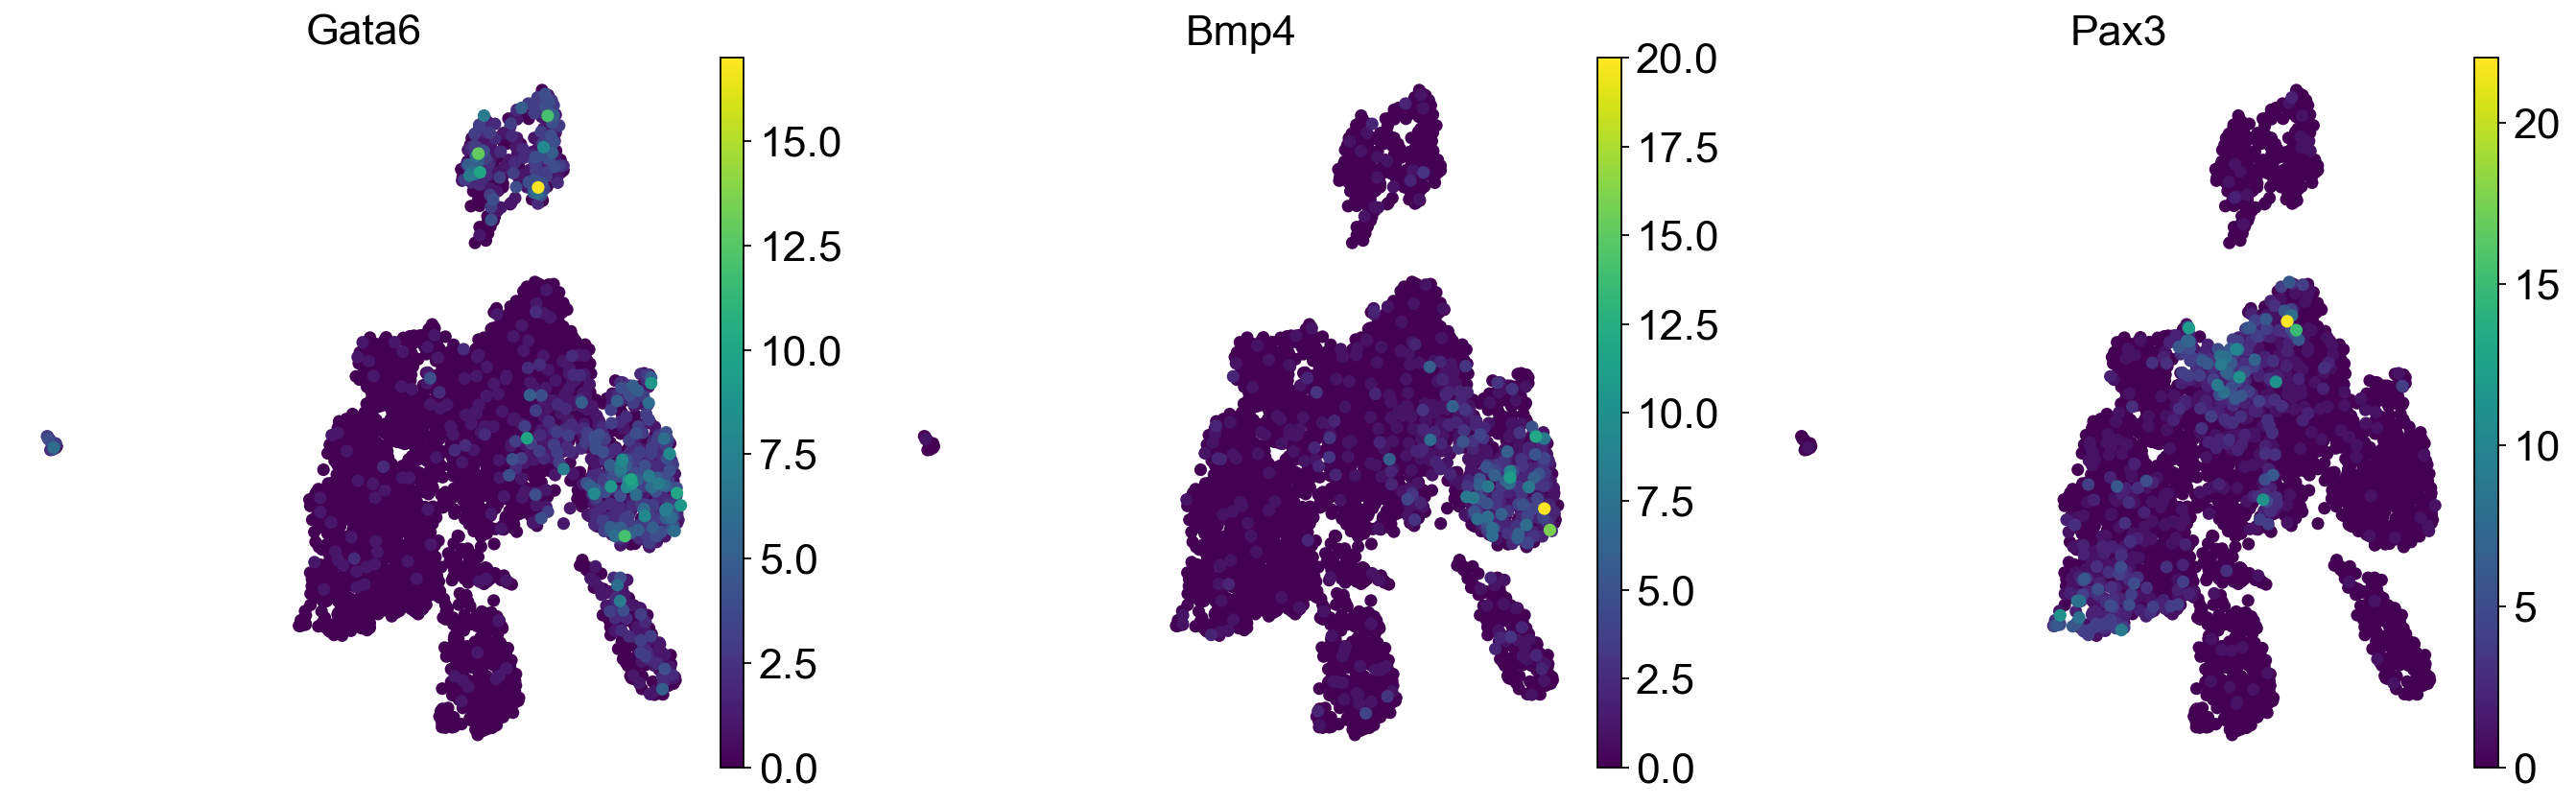

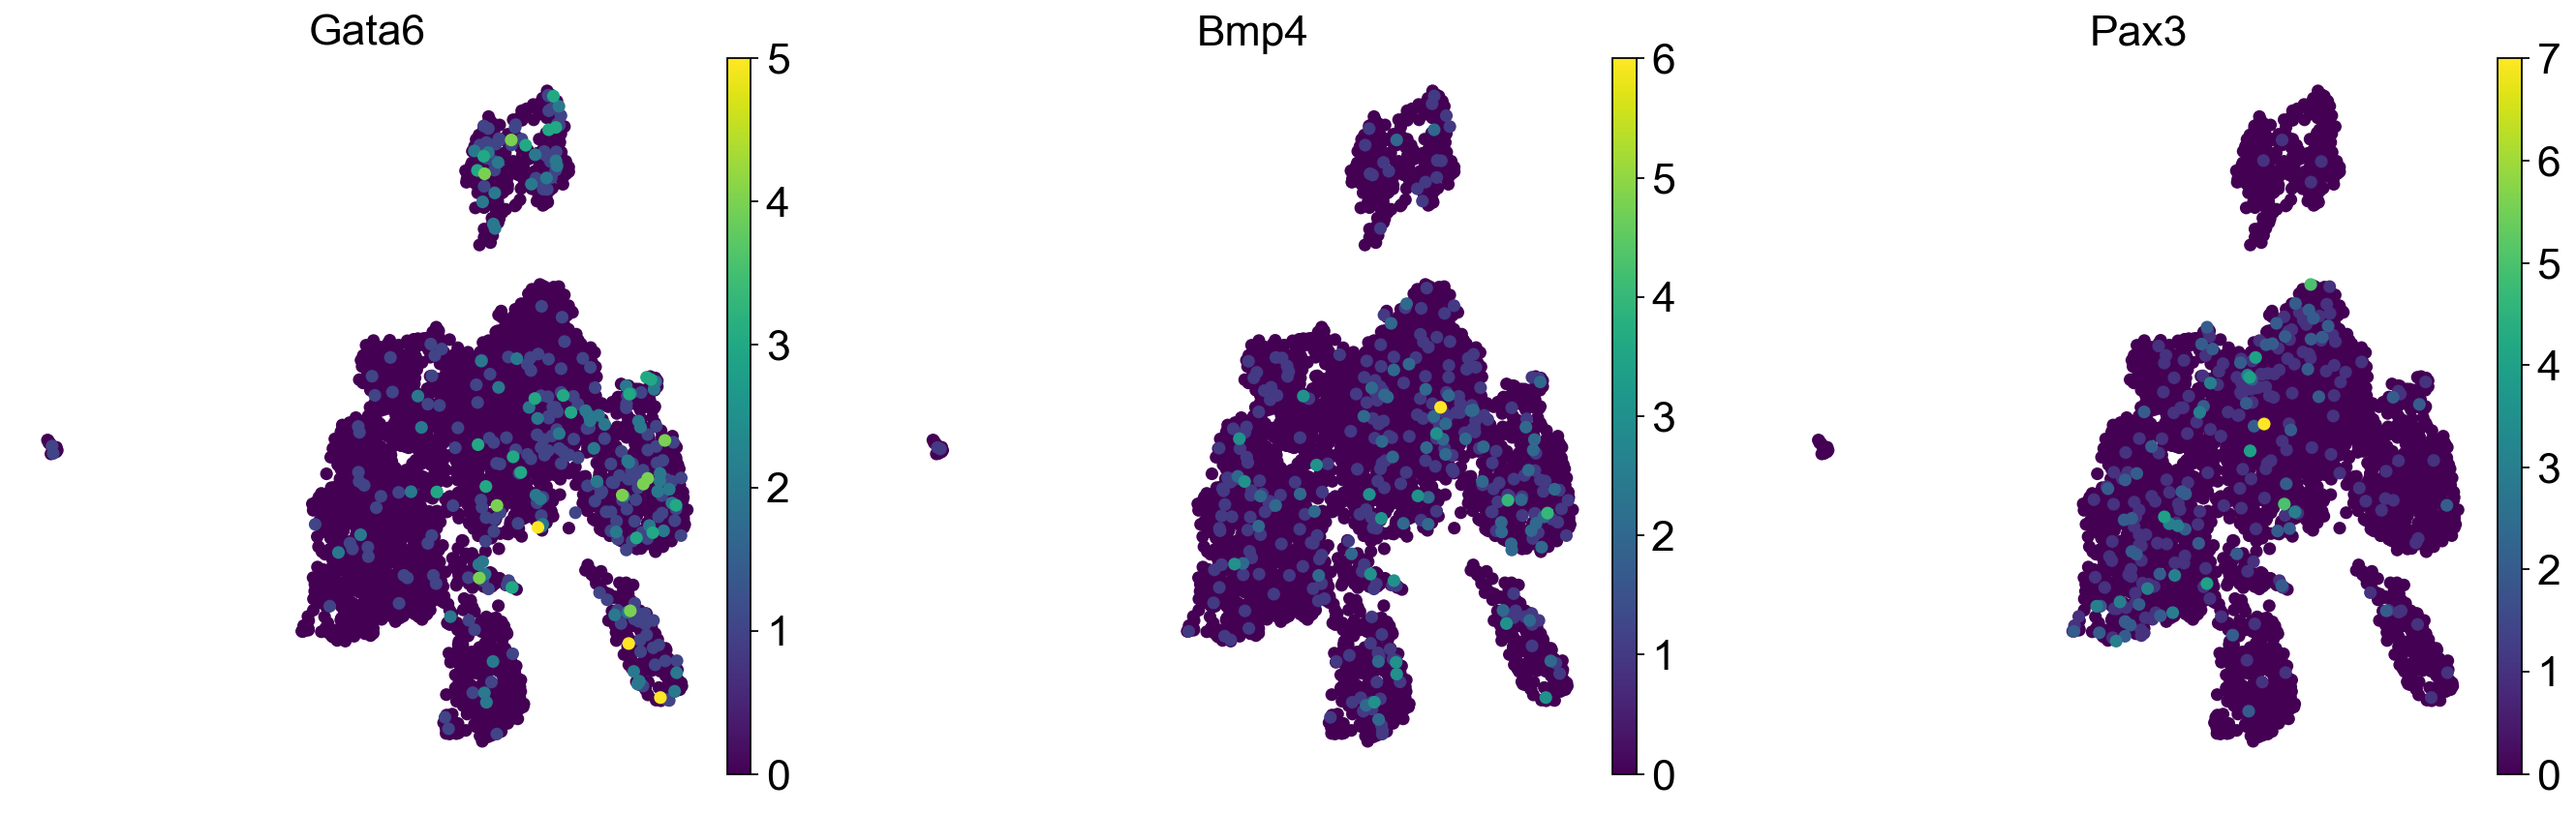

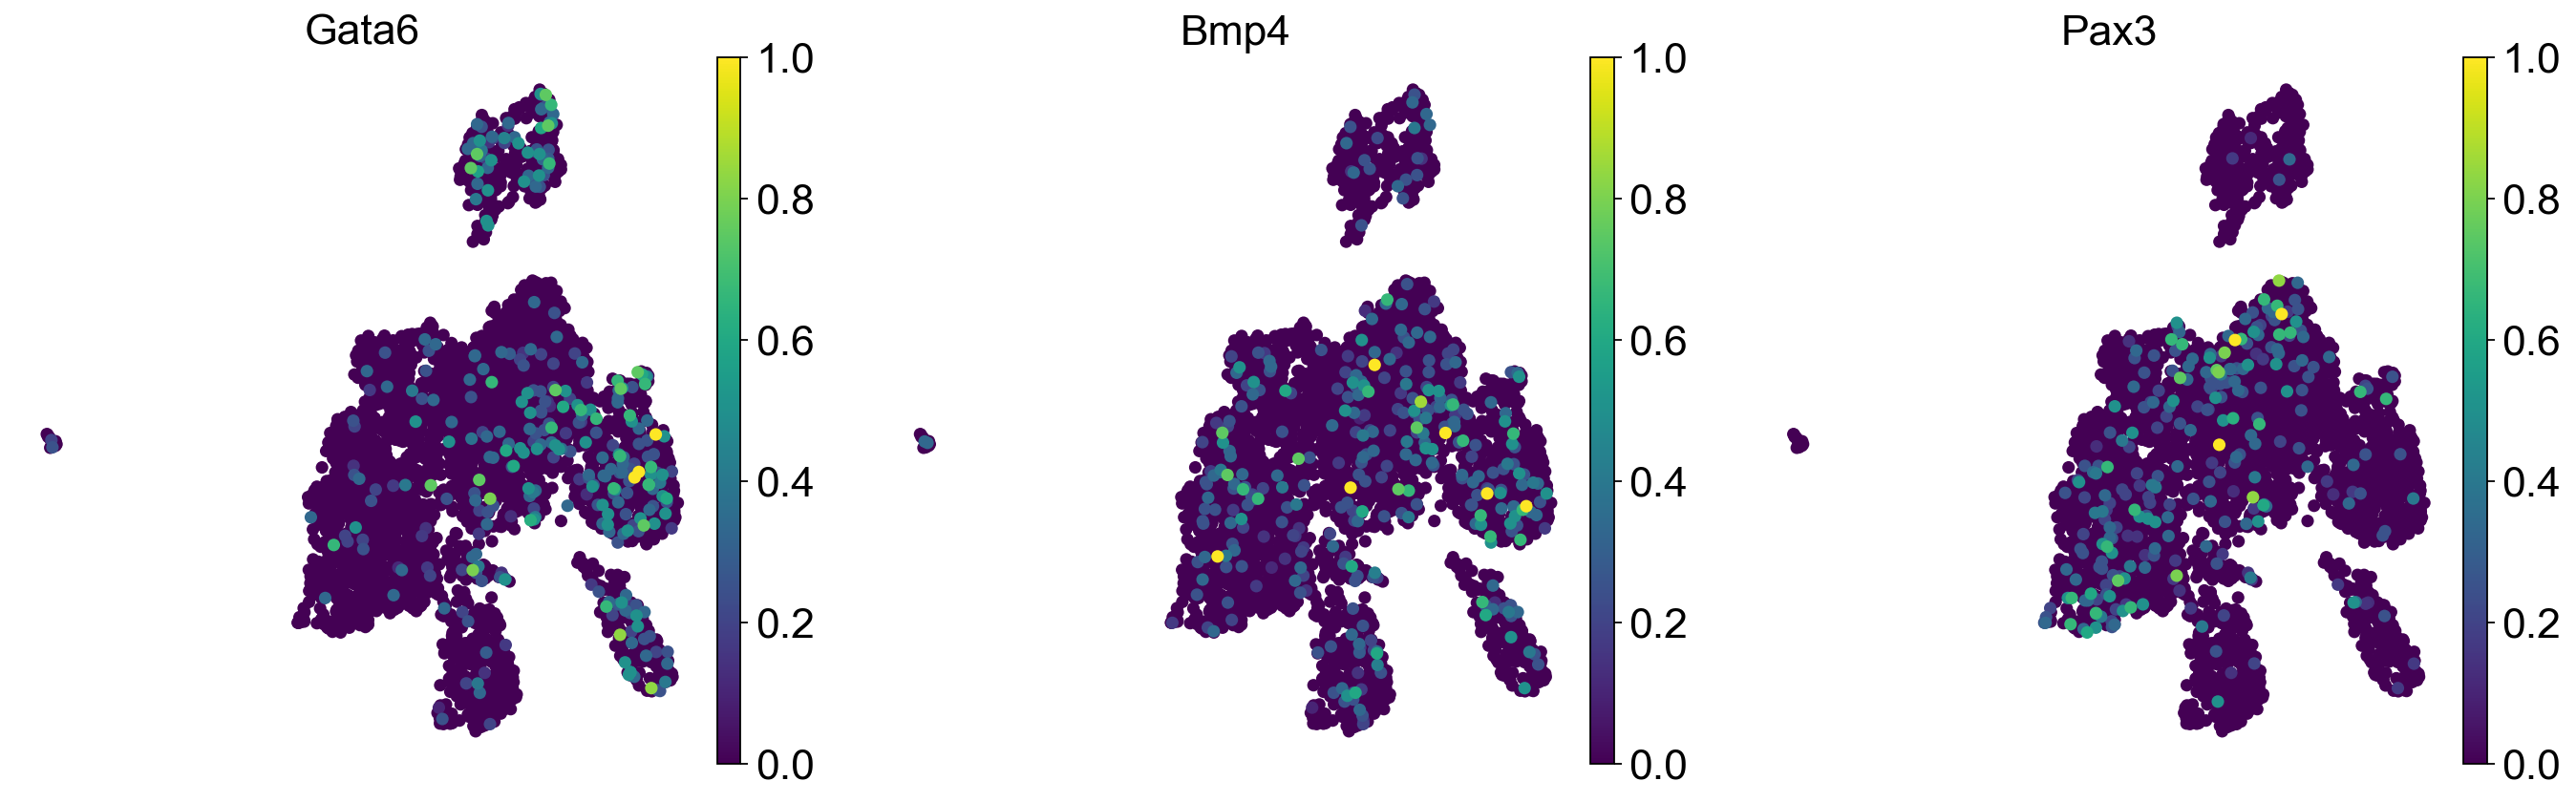

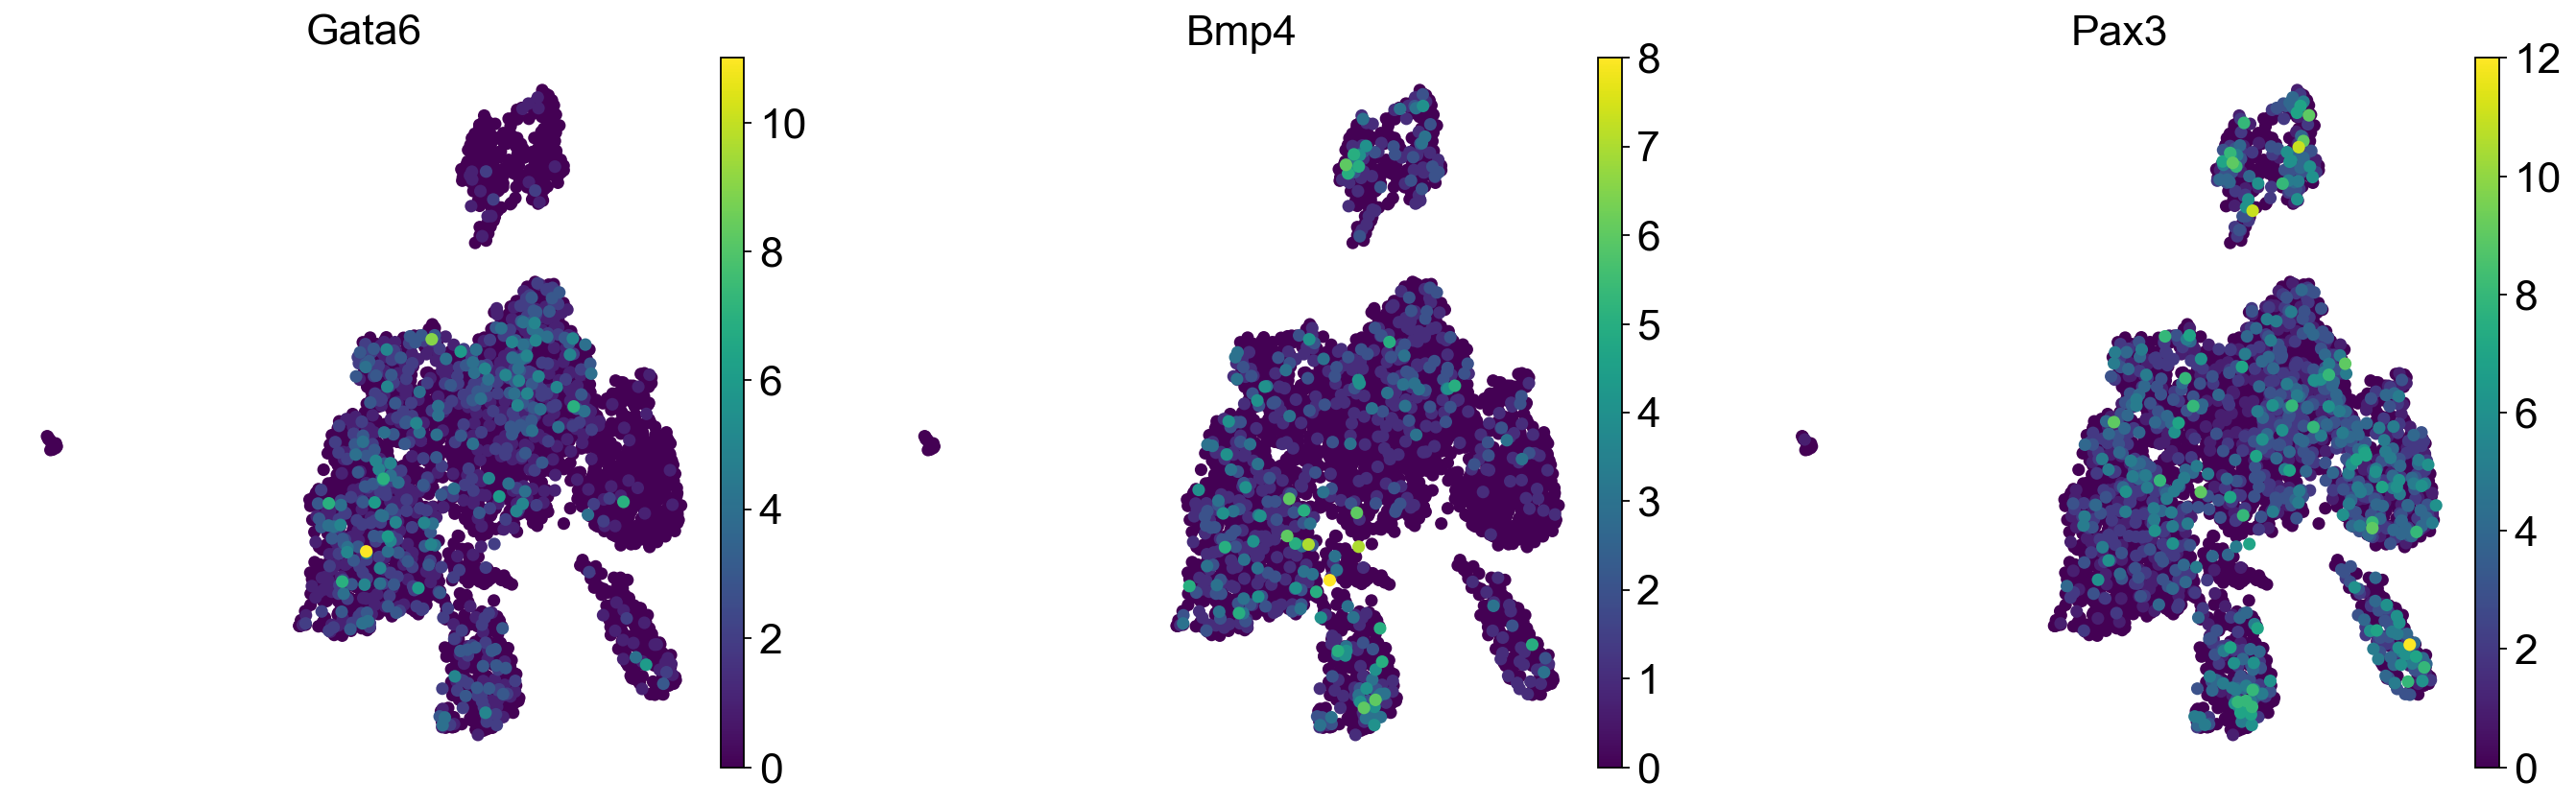

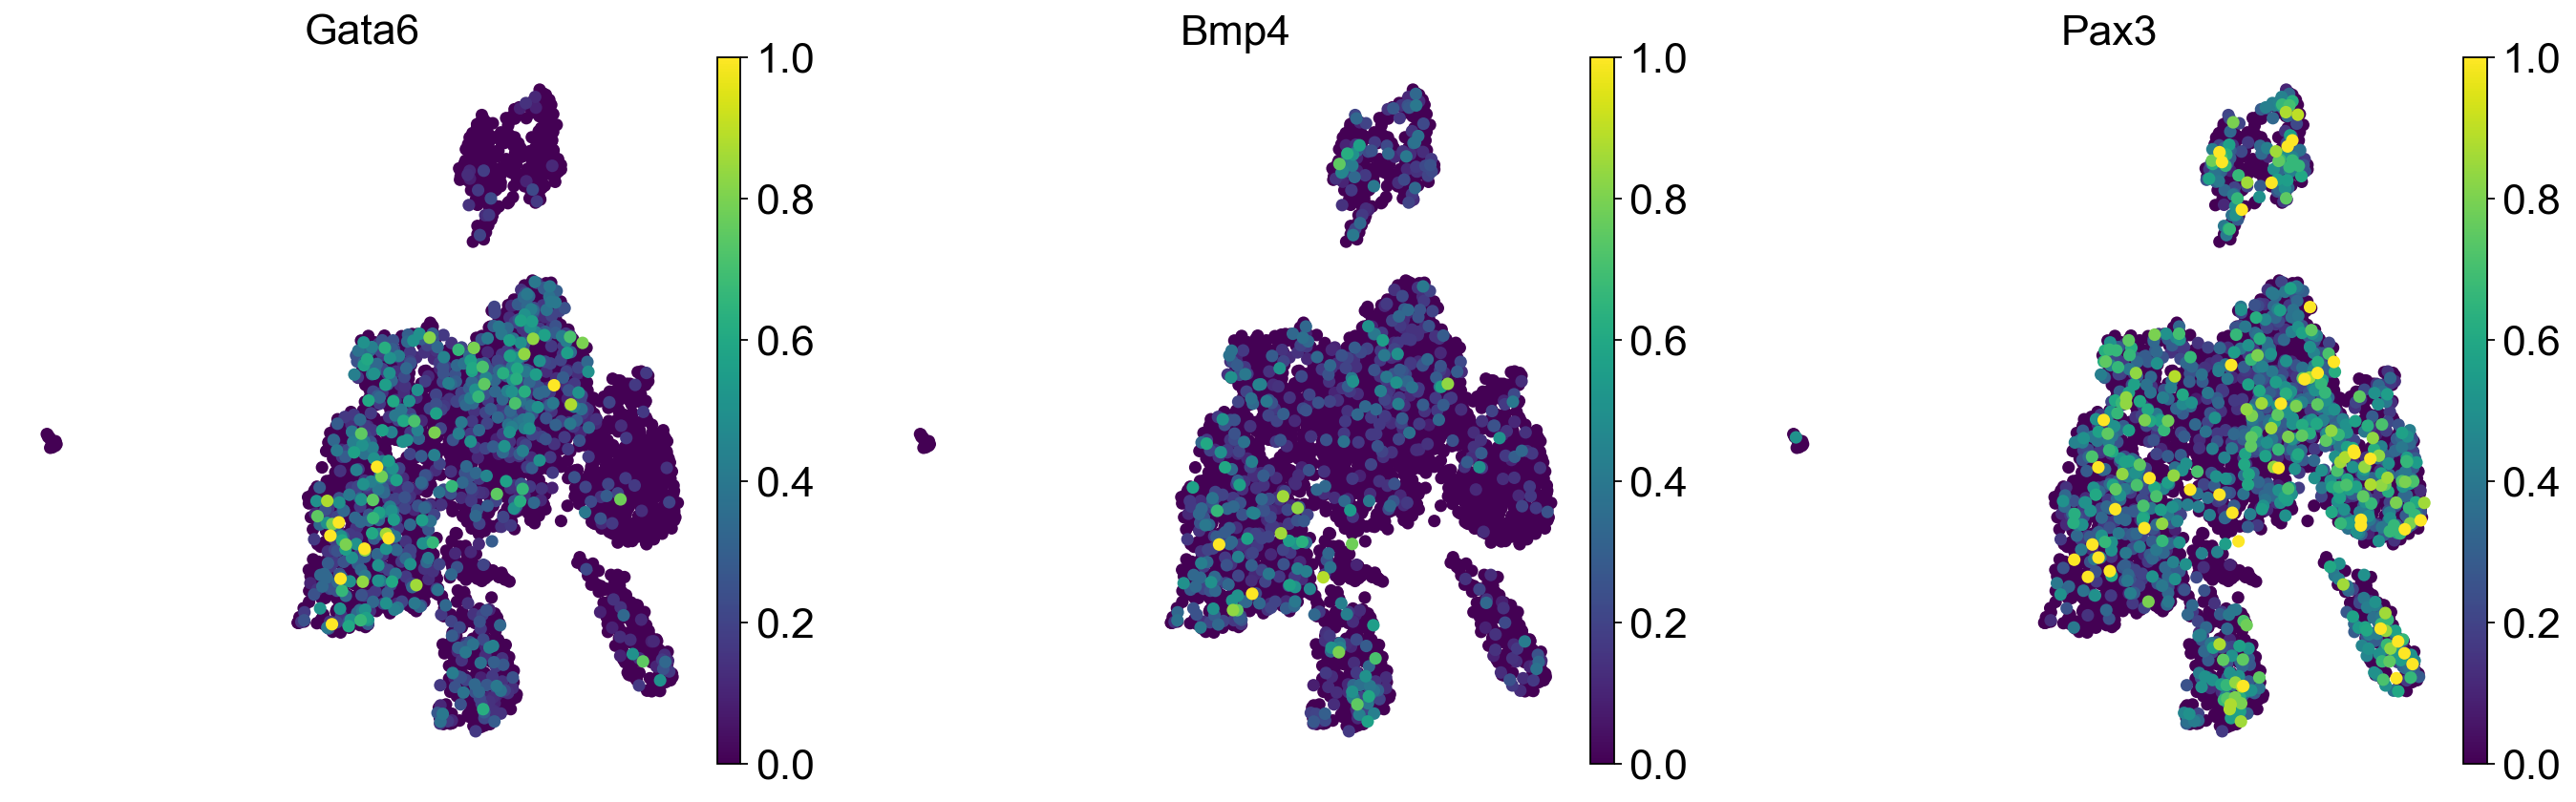

In [119]:
for layer in layers:
    sc.pl.umap(adata, color = ['Gata6', 'Bmp4', 'Pax3'], layer = layer, 
               size = 140, frameon=False)

# Finding marker genes

### Calculate differential genes for all cell types

We can start by computing a ranking for the highly differential genes in each cell type. We use a Wilcoxon rank-sum test because this is recommended. By specifying a layer, we can calculate differential genes for e.g. spliced, unspliced, k4me3 or k27me3. 

In [91]:
sc.tl.rank_genes_groups(adata, 'celltype', layer = 'unspliced', use_raw=False, method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:10)


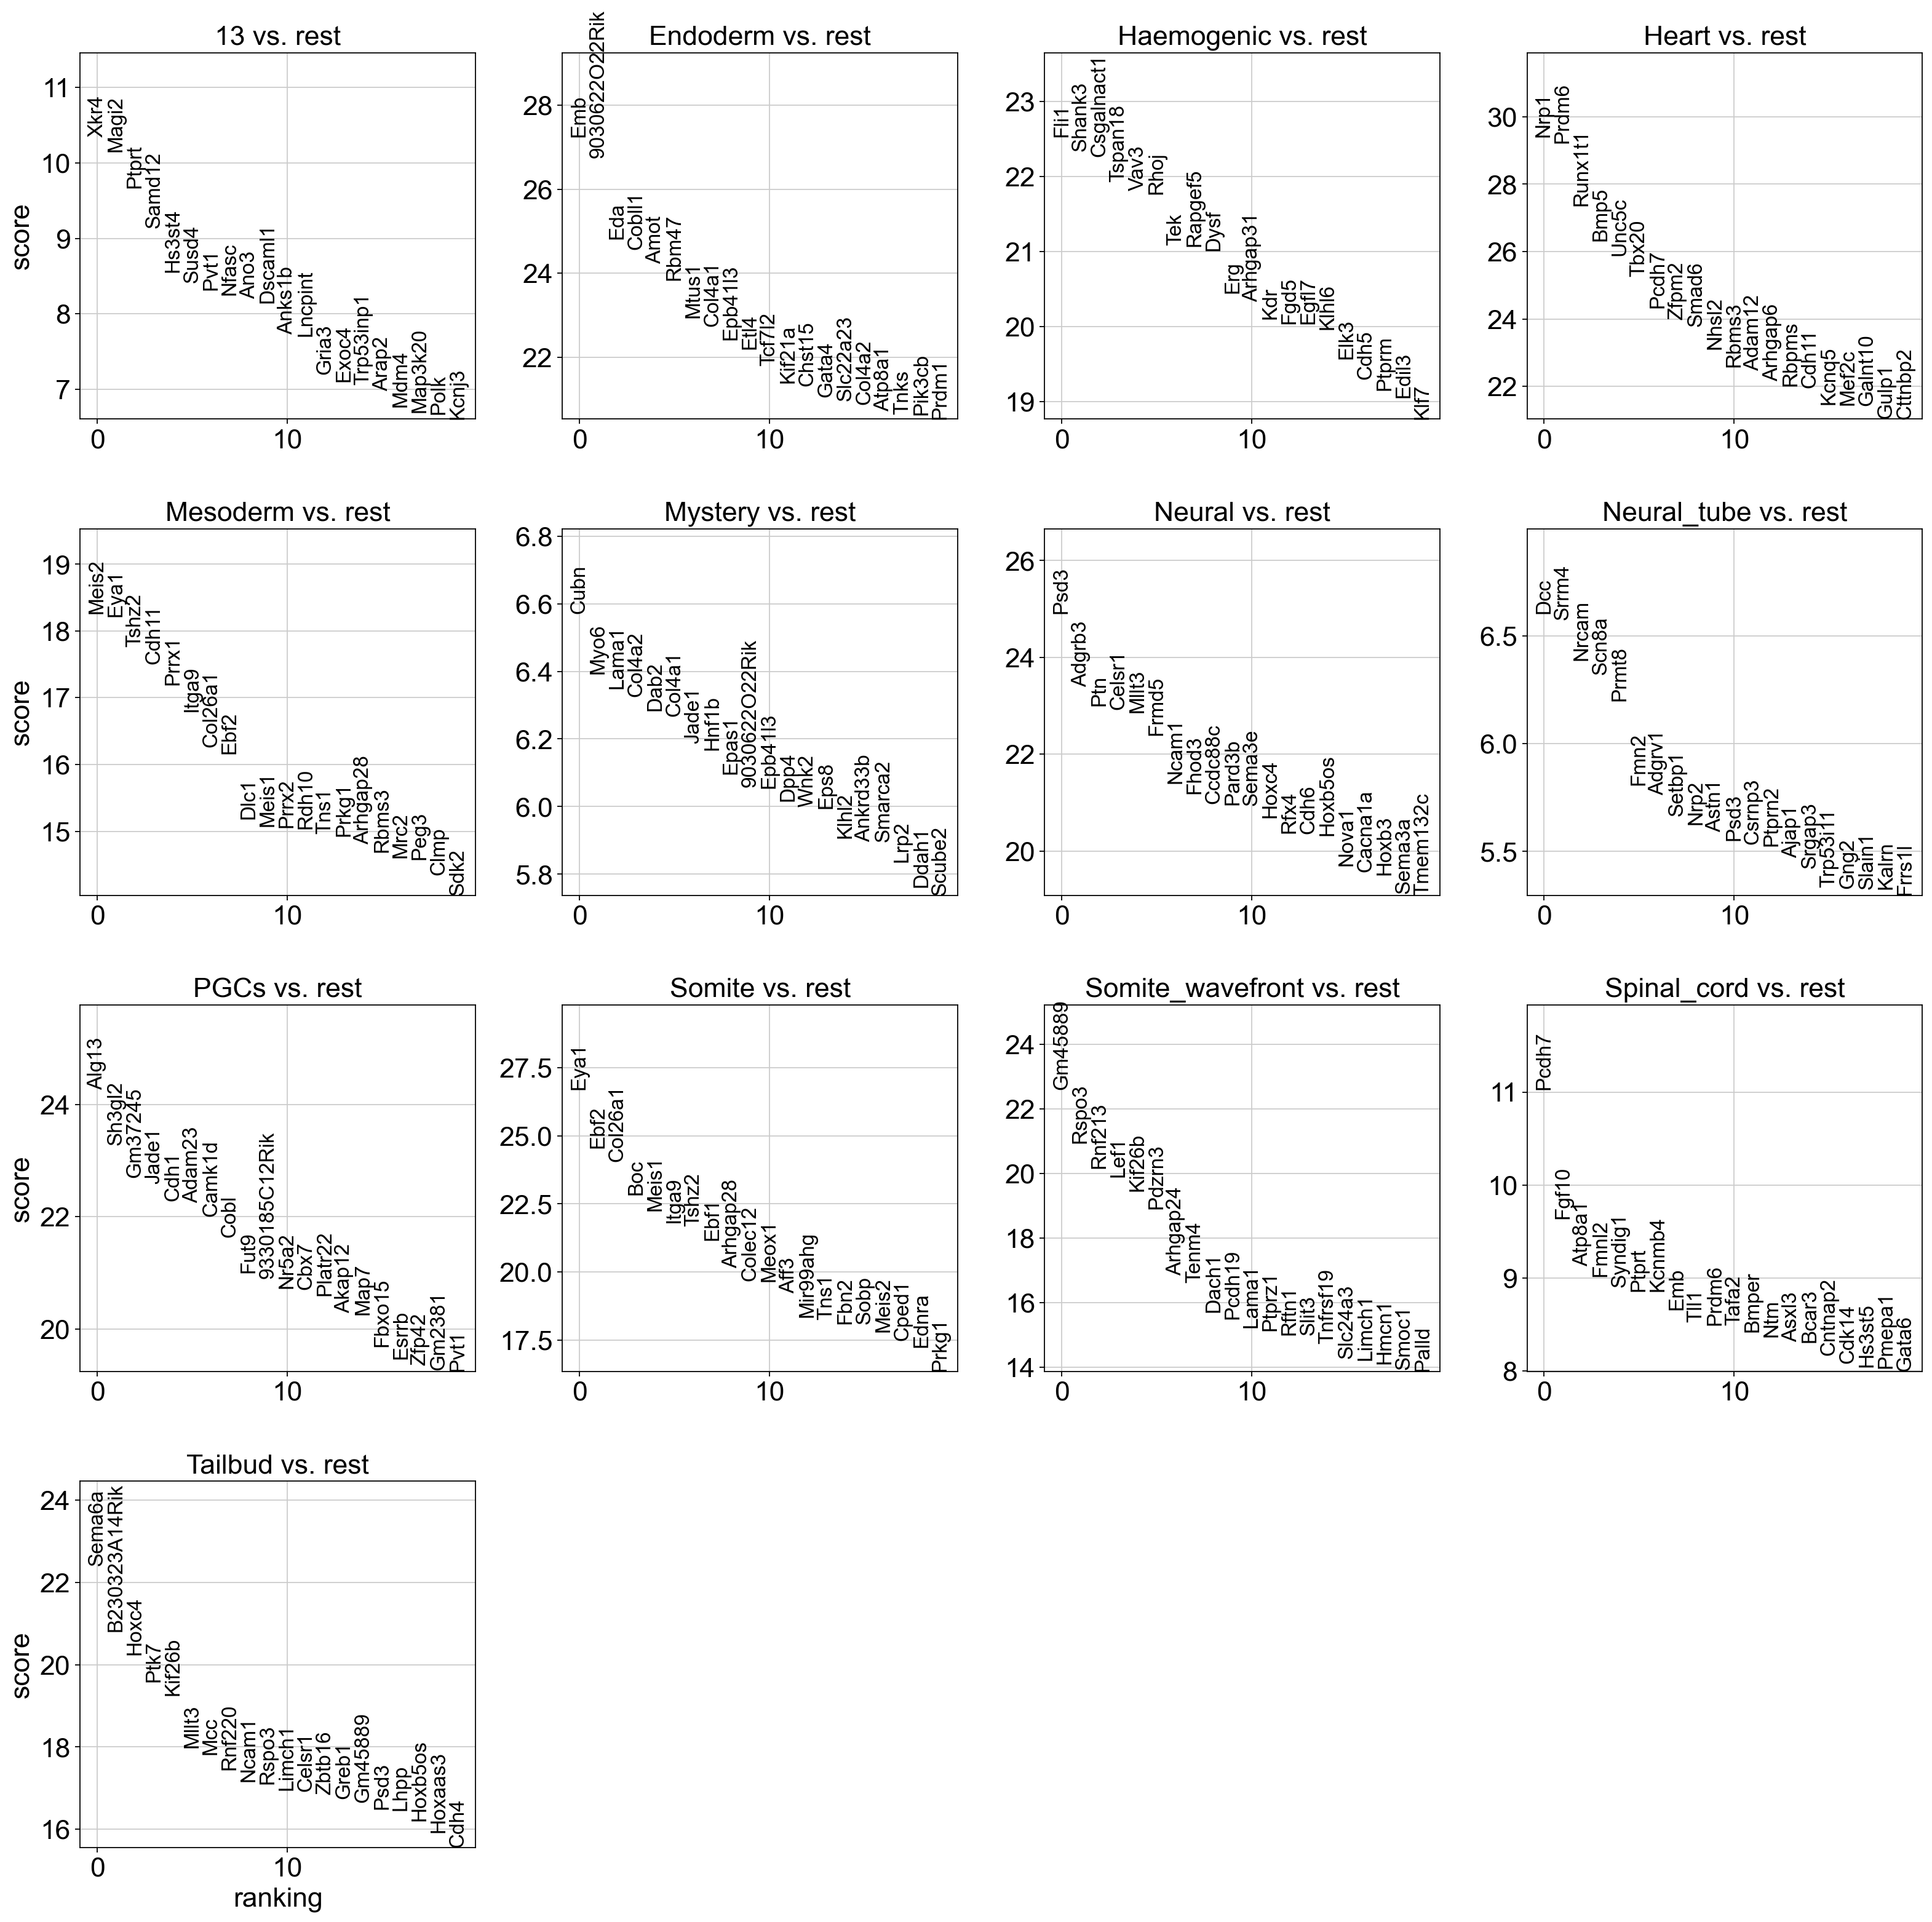

In [96]:
sc.pl.rank_genes_groups(adata, n_genes=20, fontsize = 15, sharey=False)

Here is a table with the top n differential genes (specified by head(n) ) per cell type. 

In [93]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)

13       Endoderm  Haemogenic    Heart  Mesoderm        Mystery  \
0        Xkr4            Emb        Fli1     Nrp1     Meis2           Cubn   
1       Magi2  9030622O22Rik      Shank3    Prdm6      Eya1           Myo6   
2       Ptprt            Eda  Csgalnact1  Runx1t1     Tshz2          Lama1   
3      Samd12         Cobll1     Tspan18     Bmp5     Cdh11         Col4a2   
4      Hs3st4           Amot        Vav3    Unc5c     Prrx1           Dab2   
5       Susd4          Rbm47        Rhoj    Tbx20     Itga9         Col4a1   
6        Pvt1          Mtus1         Tek    Pcdh7   Col26a1          Jade1   
7       Nfasc         Col4a1     Rapgef5    Zfpm2      Ebf2          Hnf1b   
8        Ano3        Epb41l3        Dysf    Smad6      Dlc1          Epas1   
9     Dscaml1           Etl4         Erg    Nhsl2     Meis1  9030622O22Rik   
10     Anks1b         Tcf7l2    Arhgap31    Rbms3     Prrx2        Epb41l3   
11    Lncpint         Kif21a         Kdr   Adam12     Rdh10           Dpp4   
12      Gria3         Chst15        Fgd5  Arhgap6      Tns1           Wnk2   
13      Exoc4          Gata4       Egfl7    Rbpms     Prkg1           Eps8   
14  Trp53inp1       Slc22a23       Klhl6    Cdh11  Arhgap28          Klhl2   
15      Arap2         Col4a2        Elk3    Kcnq5     Rbms3       Ankrd33b   
16       Mdm4         Atp8a1        Cdh5    Mef2c      Mrc2        Smarca2   
17    Map3k20           Tnks       Ptprm  Galnt10      Peg3           Lrp2   
18       Polk         Pik3cb       Edil3    Gulp1      Clmp          Ddah1   
19      Kcnj3          Prdm1        Klf7  Cttnbp2      Sdk2         Scube2   

      Neural Neural_tube           PGCs    Somite Somite_wavefront  \
0       Psd3         Dcc          Alg13      Eya1          Gm45889   
1     Adgrb3       Srrm4         Sh3gl2      Ebf2            Rspo3   
2        Ptn       Nrcam        Gm37245   Col26a1           Rnf213   
3     Celsr1       Scn8a          Jade1       Boc             Lef1   
4      Mllt3       Prmt8           Cdh1     Meis1           Kif26b   
5      Frmd5        Fmn2         Adam23     Itga9           Pdzrn3   
6      Ncam1      Adgrv1         Camk1d     Tshz2         Arhgap24   
7      Fhod3      Setbp1           Cobl      Ebf1            Tenm4   
8    Ccdc88c        Nrp2           Fut9  Arhgap28            Dach1   
9     Pard3b       Astn1  9330185C12Rik   Colec12           Pcdh19   
10    Sema3e        Psd3          Nr5a2     Meox1            Lama1   
11     Hoxc4      Csrnp3           Cbx7      Aff3           Ptprz1   
12      Rfx4      Ptprn2        Platr22  Mir99ahg            Rftn1   
13      Cdh6       Ajap1         Akap12      Tns1            Slit3   
14   Hoxb5os      Srgap3           Map7      Fbn2         Tnfrsf19   
15     Nova1    Trp53i11         Fbxo15      Sobp          Slc24a3   
16   Cacna1a        Gng2          Esrrb     Meis2           Limch1   
17     Hoxb3      Slain1          Zfp42     Cped1            Hmcn1   
18    Sema3a       Kalrn         Gm2381     Ednra            Smoc1   
19  Tmem132c      Frrs1l           Pvt1     Prkg1            Palld   

   Spinal_cord        Tailbud  
0        Pcdh7         Sema6a  
1        Fgf10  B230323A14Rik  
2       Atp8a1          Hoxc4  
3        Fmnl2           Ptk7  
4      Syndig1         Kif26b  
5        Ptprt          Mllt3  
6       Kcnmb4            Mcc  
7          Emb         Rnf220  
8         Tll1          Ncam1  
9        Prdm6          Rspo3  
10       Tafa2         Limch1  
11       Bmper         Celsr1  
12         Ntm         Zbtb16  
13       Asxl3          Greb1  
14       Bcar3        Gm45889  
15     Cntnap2           Psd3  
16       Cdk14           Lhpp  
17      Hs3st5        Hoxb5os  
18      Pmepa1        Hoxaas3  
19       Gata6           Cdh4

We can also plot the top n differential genes for specific cell types on top of the umap. Simply specify below which cell type you wish to plot, how many genes, and which layer/data type.

In [146]:
celltype = 'Neural'
topgenes = 10
layer = 'k27_norm'

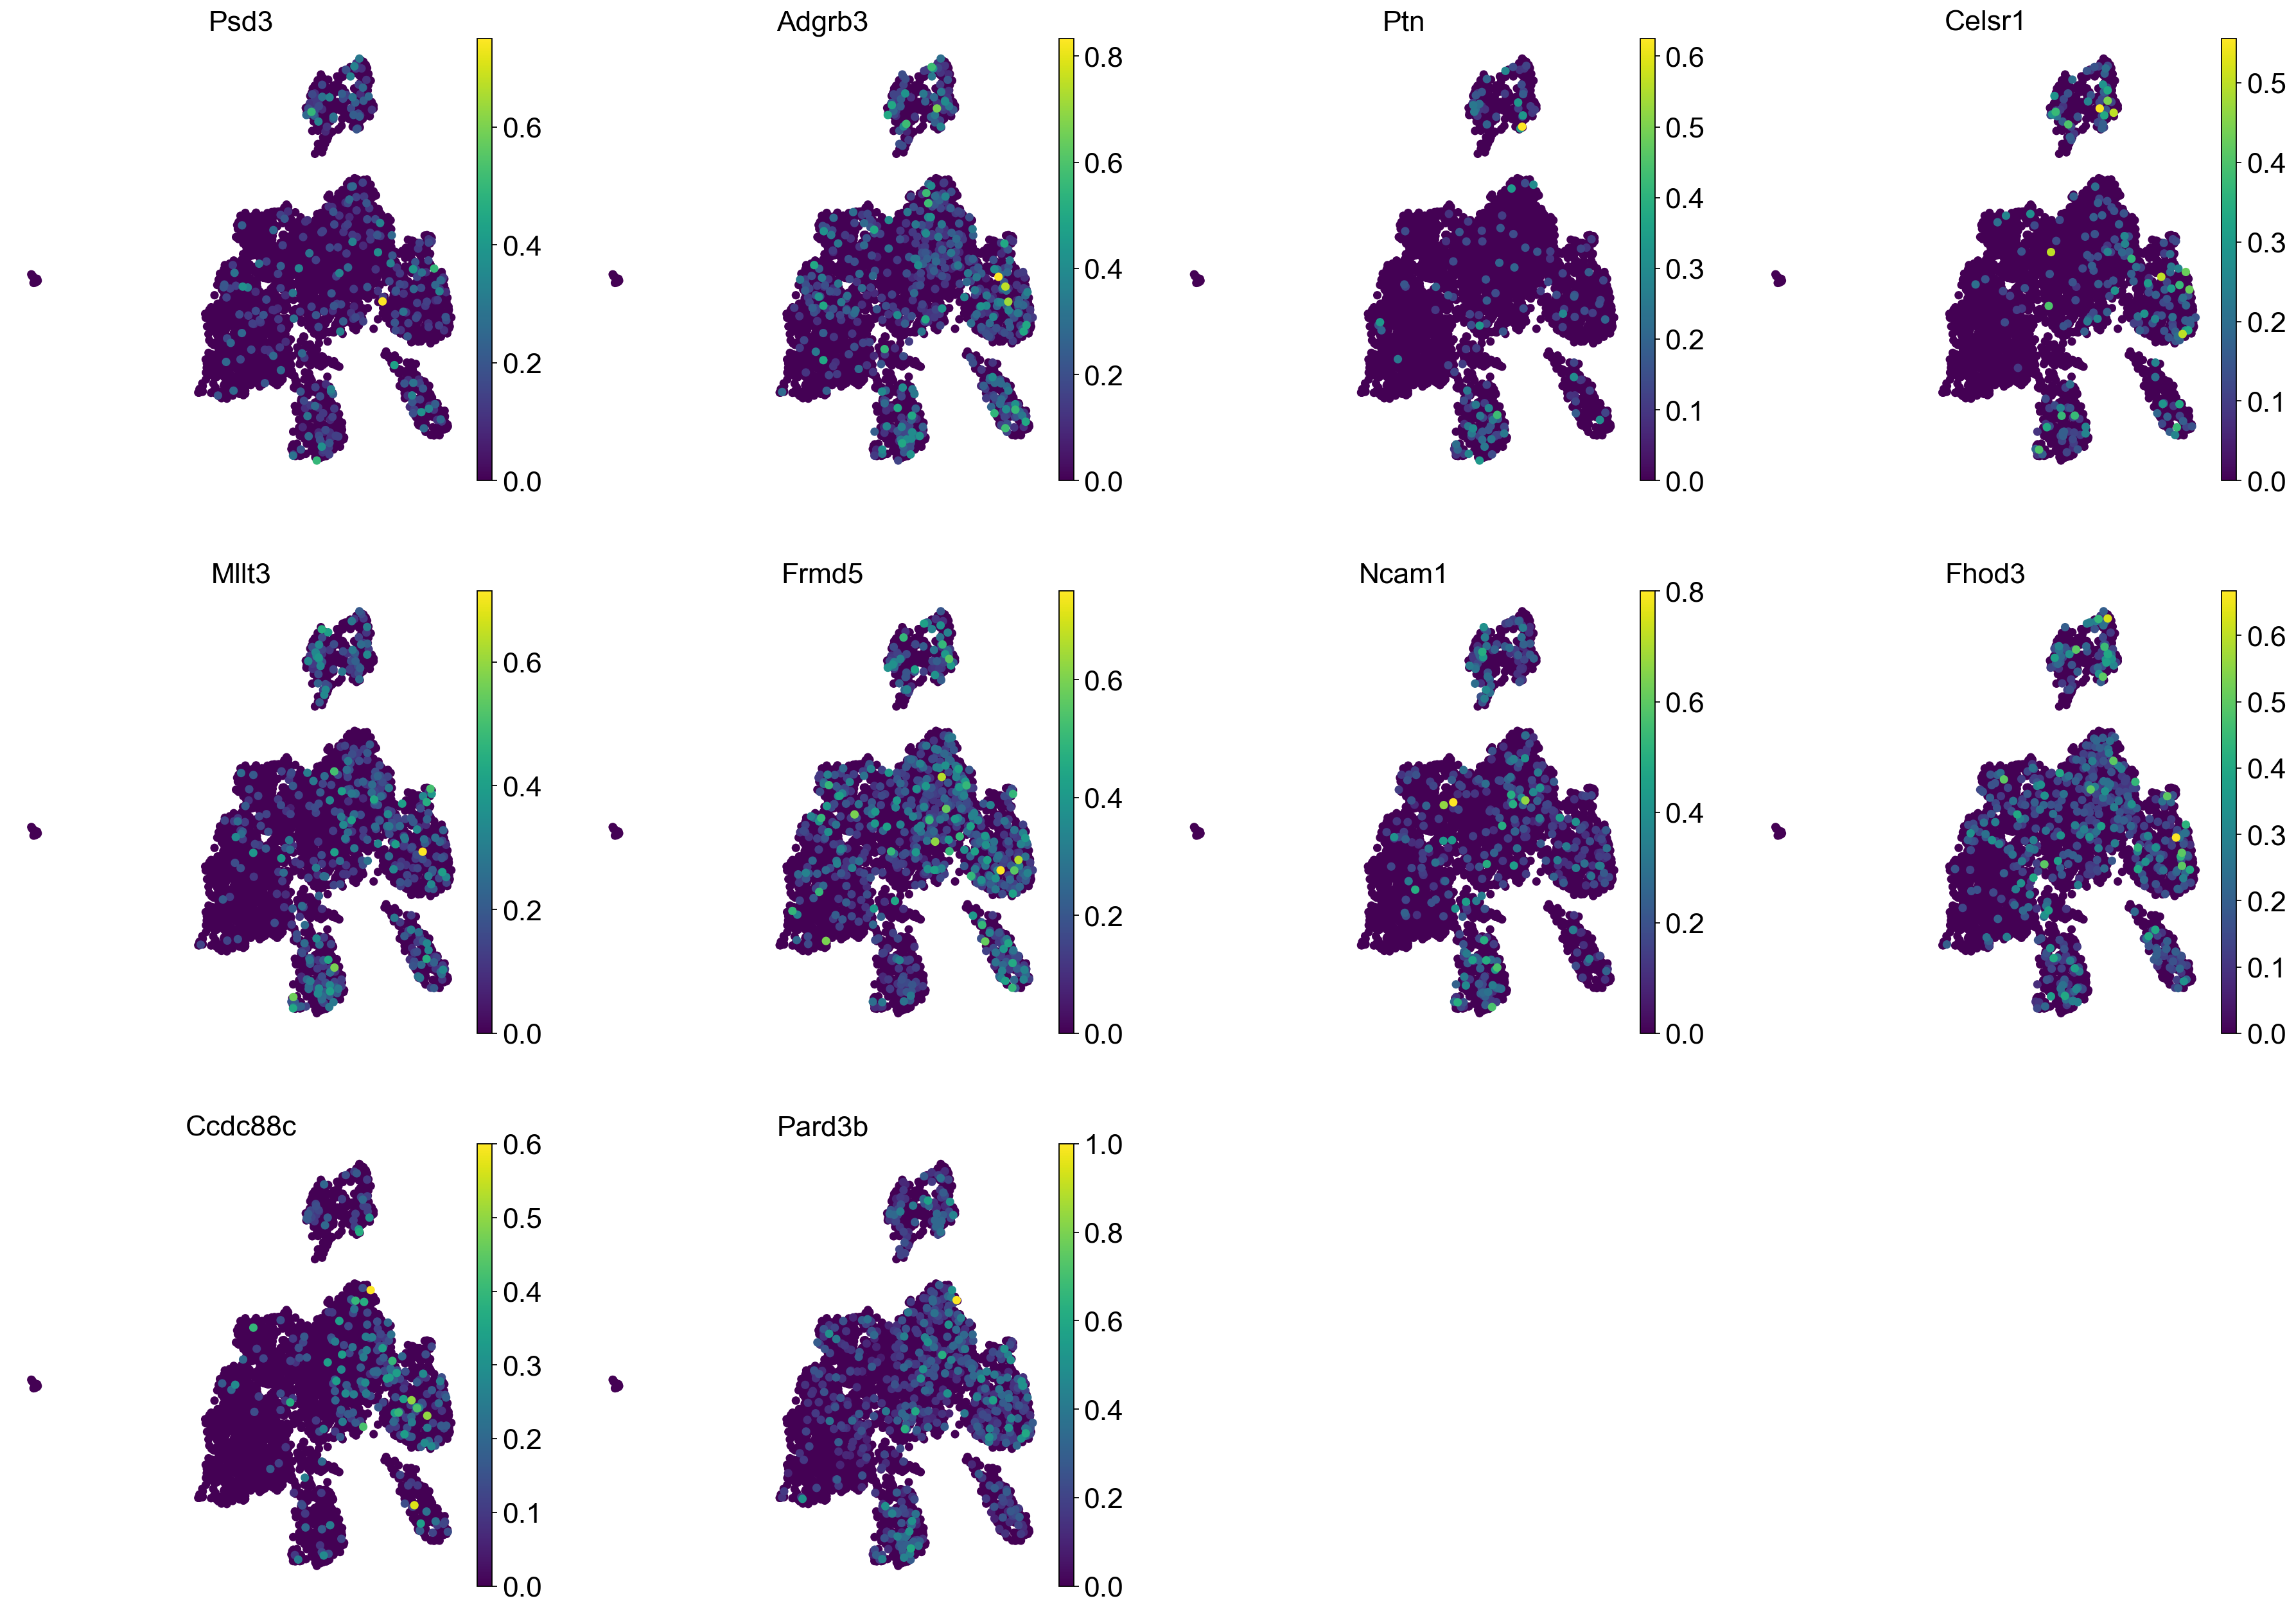

In [147]:
sc.pl.umap(adata, color=adata.uns['rank_genes_groups']['names'][celltype][0:topgenes], layer = layer, 
           size = 140, frameon=False)

In [149]:
layers = ['unspliced', 'spliced', 'k4_norm', 'k27_norm']

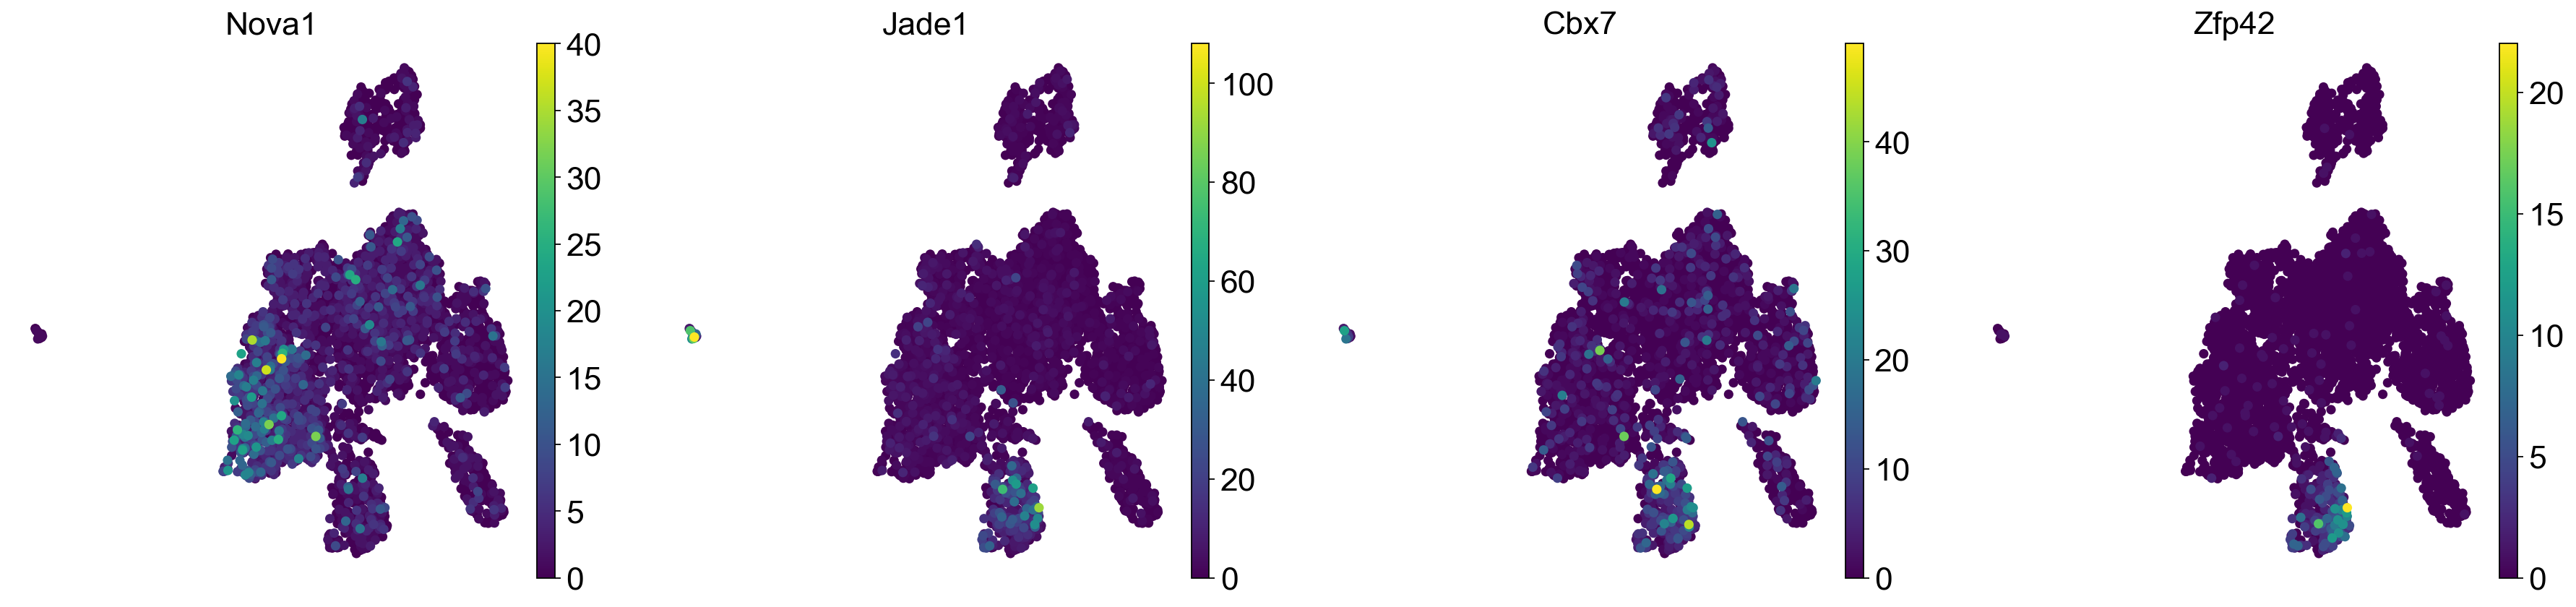

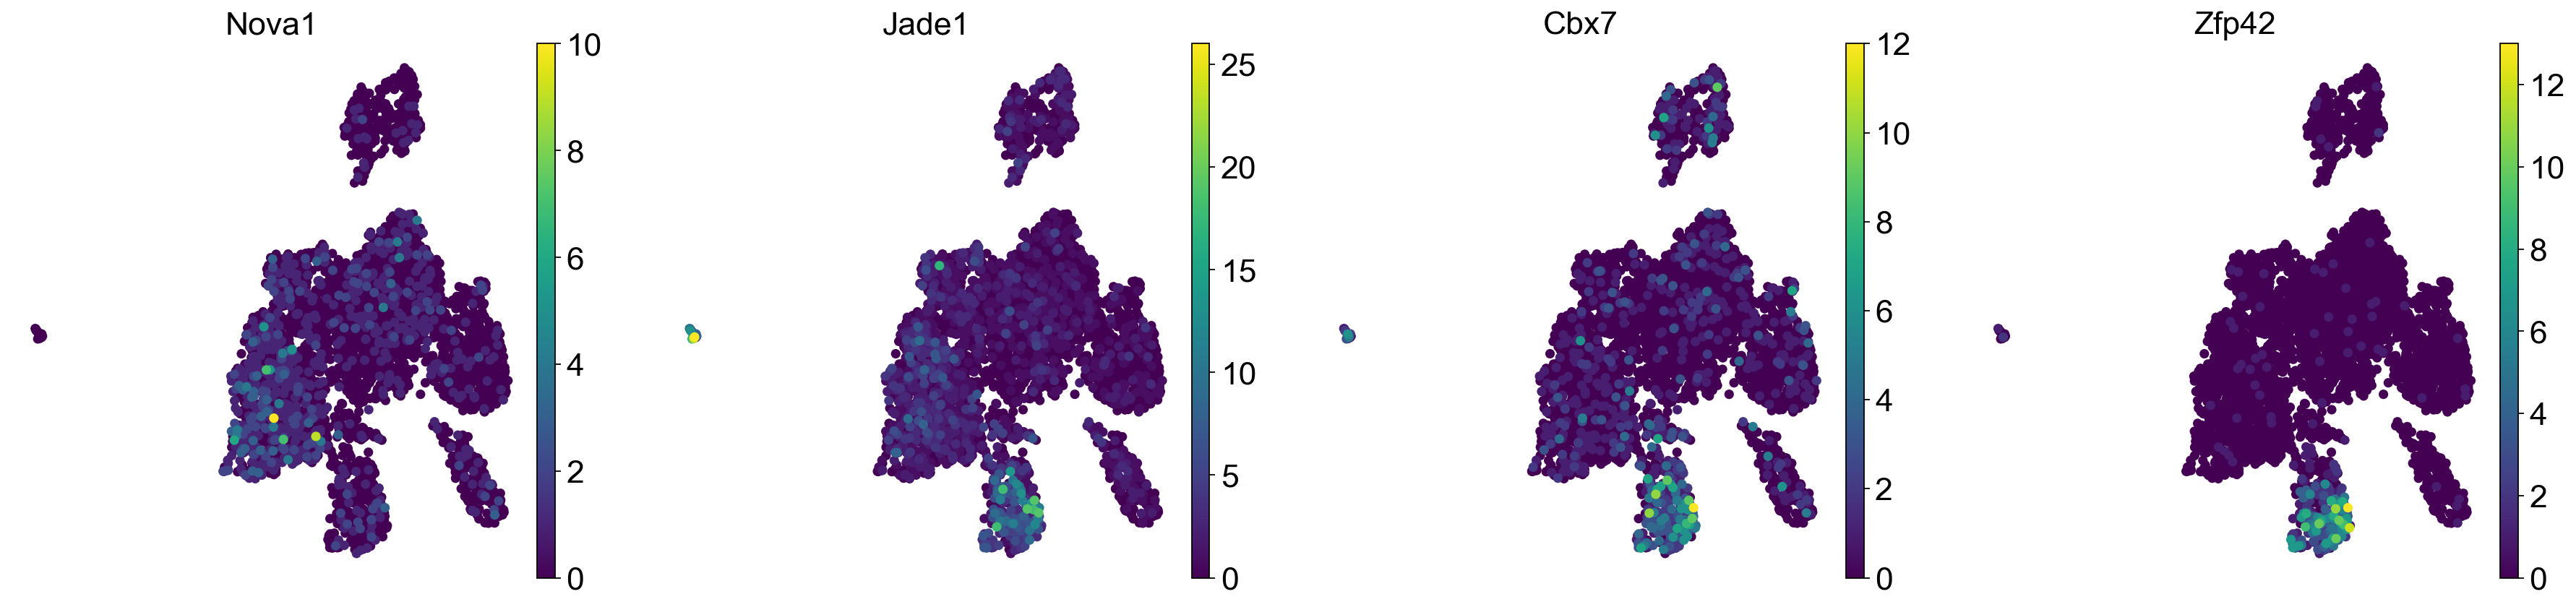

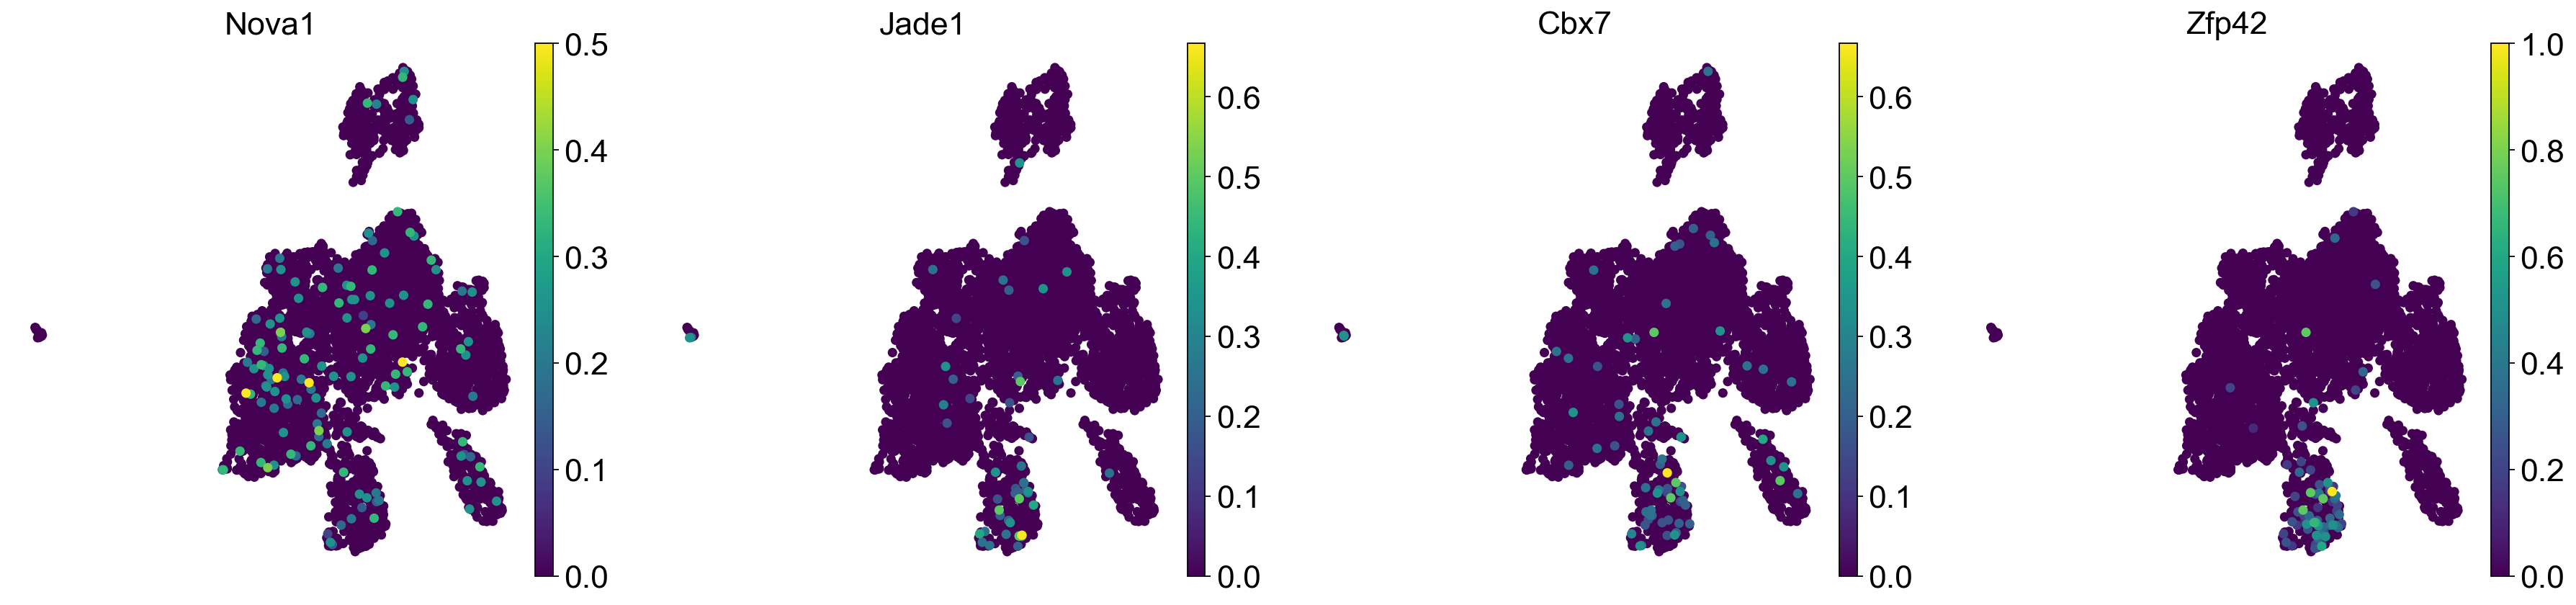

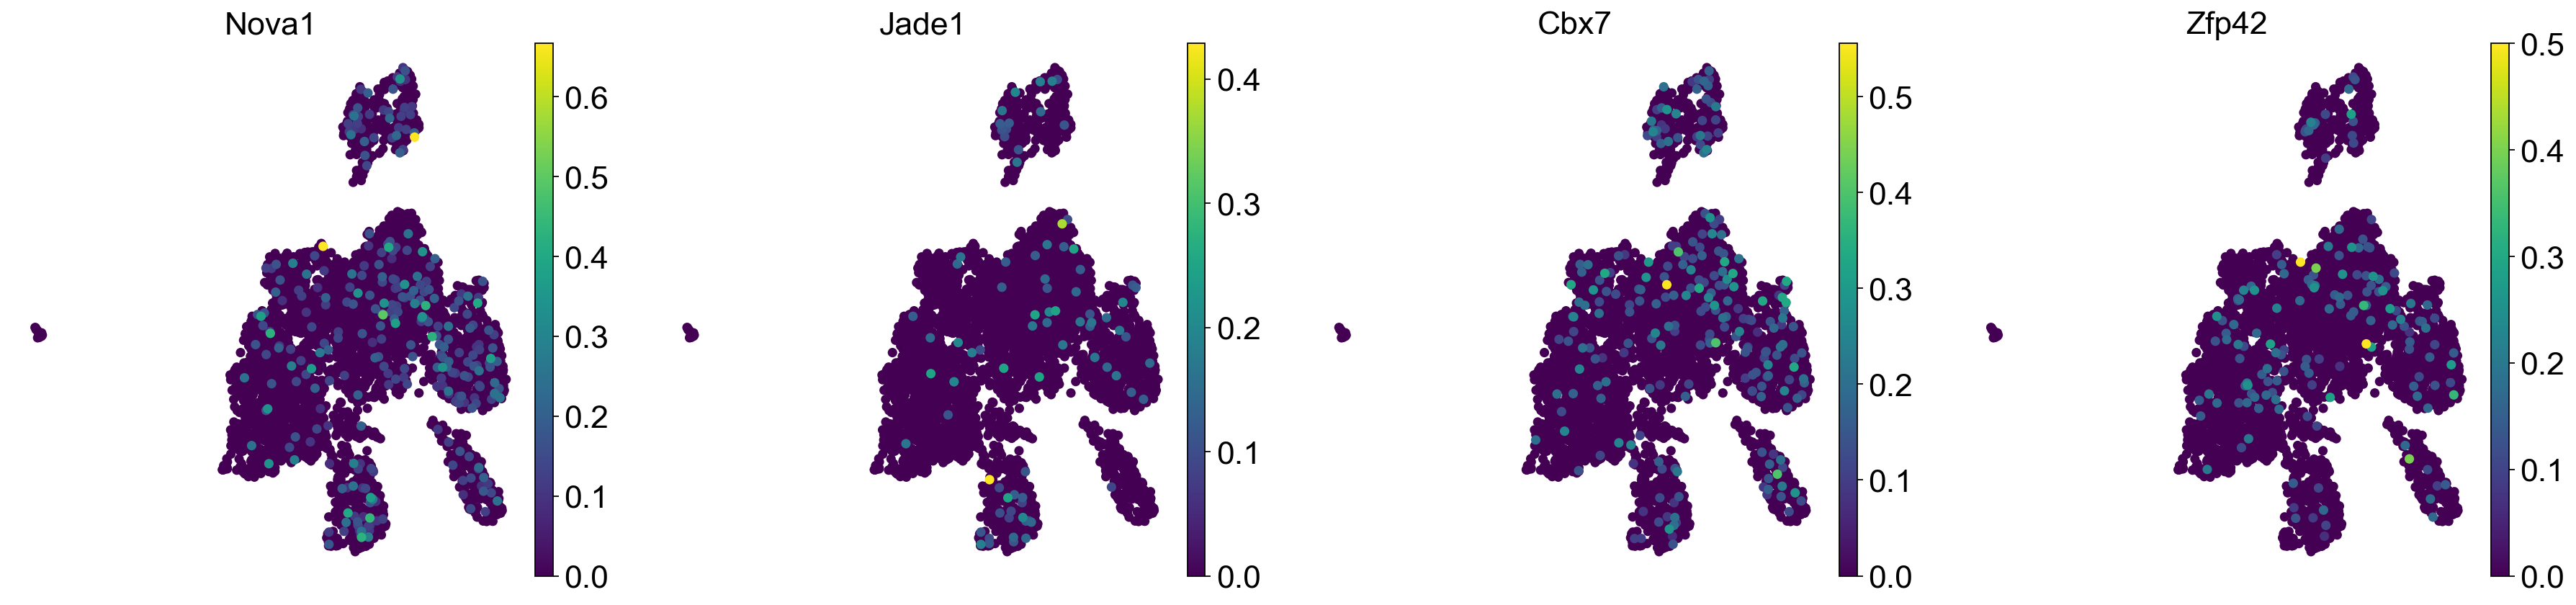

In [157]:
for layer in layers:
    sc.pl.umap(adata, color = ['Nova1','Jade1','Cbx7','Zfp42'], layer = layer, 
               size = 140, frameon=False)

### Compare specific cell types with each other and rank differential genes between them

We can compare one or more cell type(s) to one other (reference) cell type. <br/>
E.g. We can compare neural to heart, or we can compare neural + neural_tube to heart and calculate the top differential genes.

In [74]:
sc.tl.rank_genes_groups(adata, 'celltype', groups=['Neural', 'Neural_tube'], reference='Heart', method='wilcoxon')

ranking genes
--> Few observations in a group for normal approximation (<=25). Lower test accuracy.
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


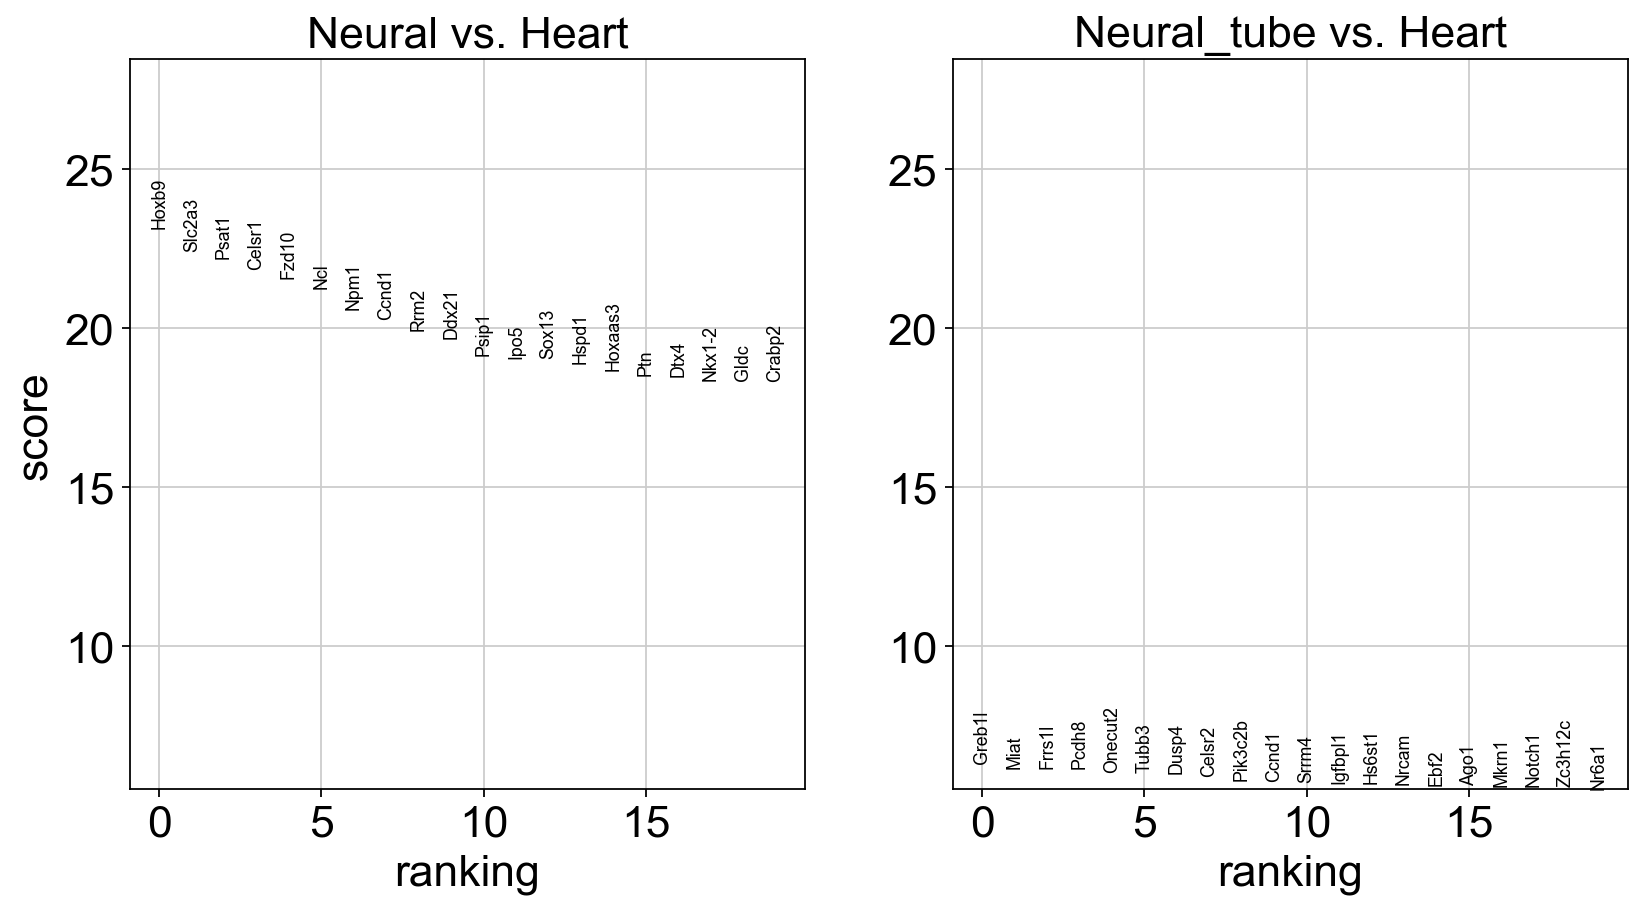

In [75]:
sc.pl.rank_genes_groups(adata, groups=['Neural', 'Neural_tube'], n_genes=20)

We can also make violin plots to visualize the results

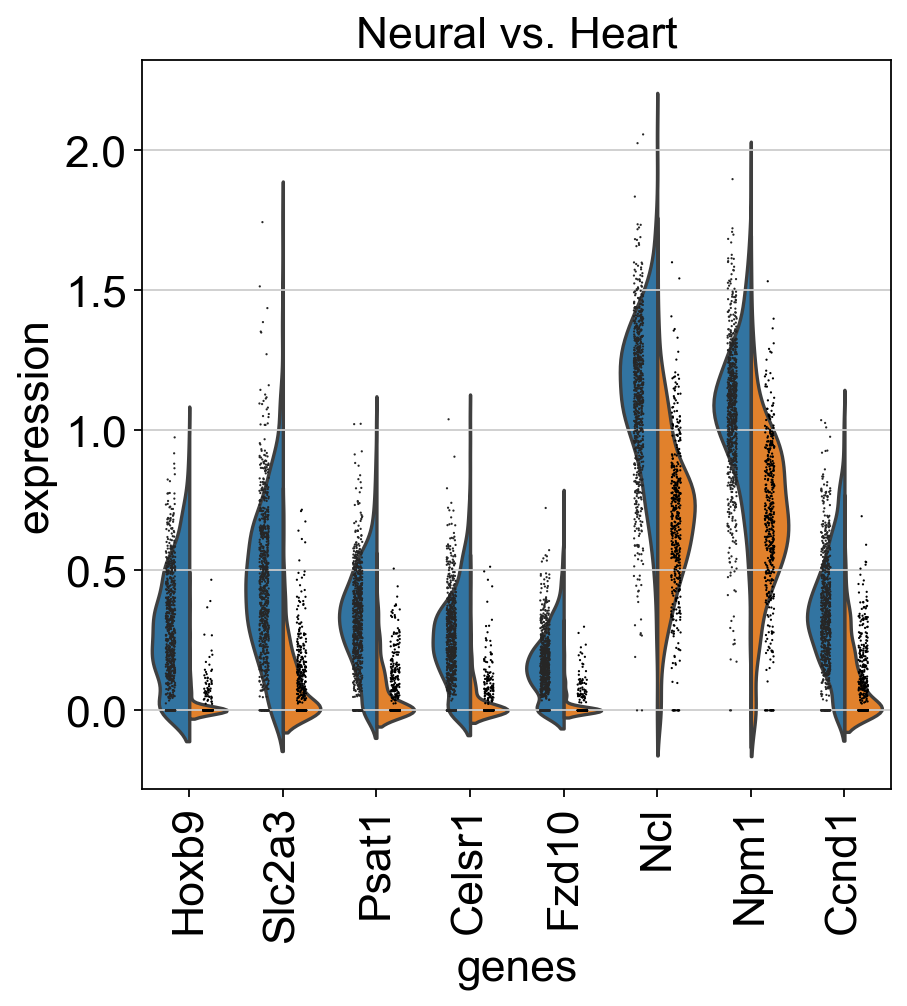

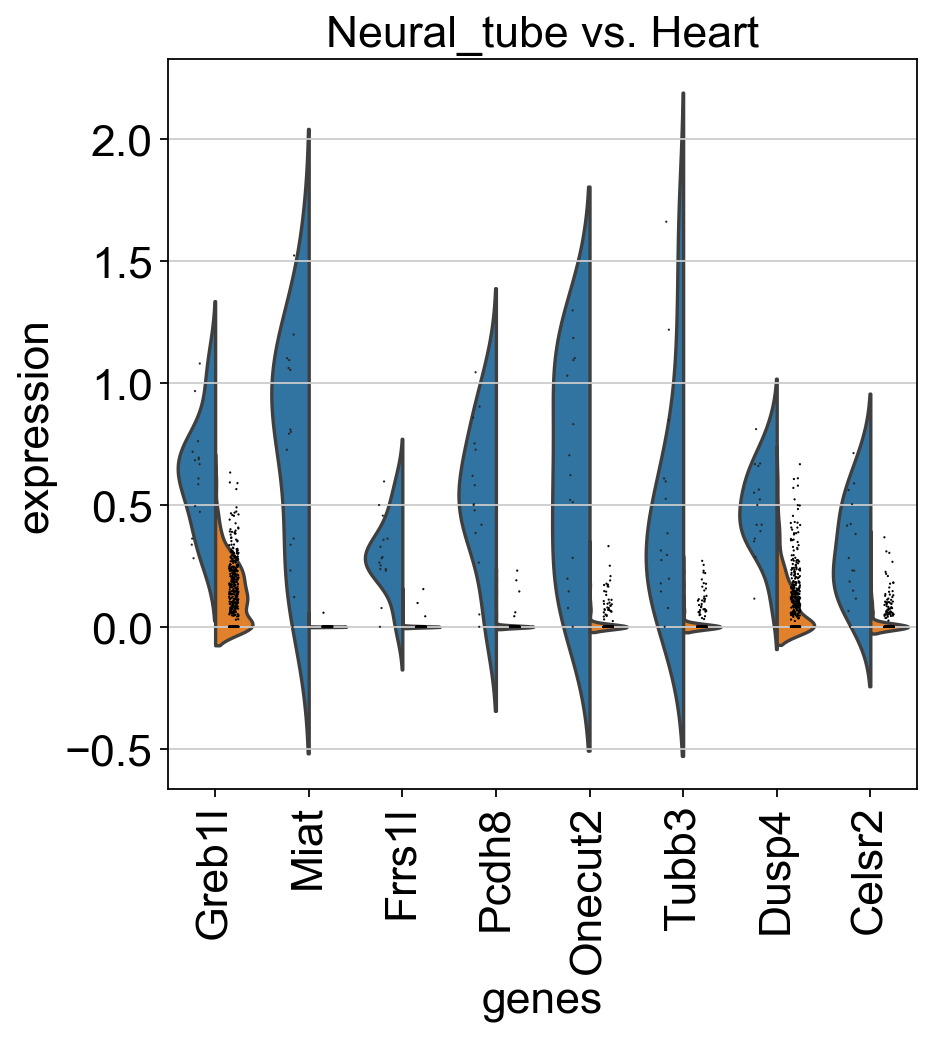

In [76]:
sc.pl.rank_genes_groups_violin(adata, groups=['Neural','Neural_tube'], n_genes=8)

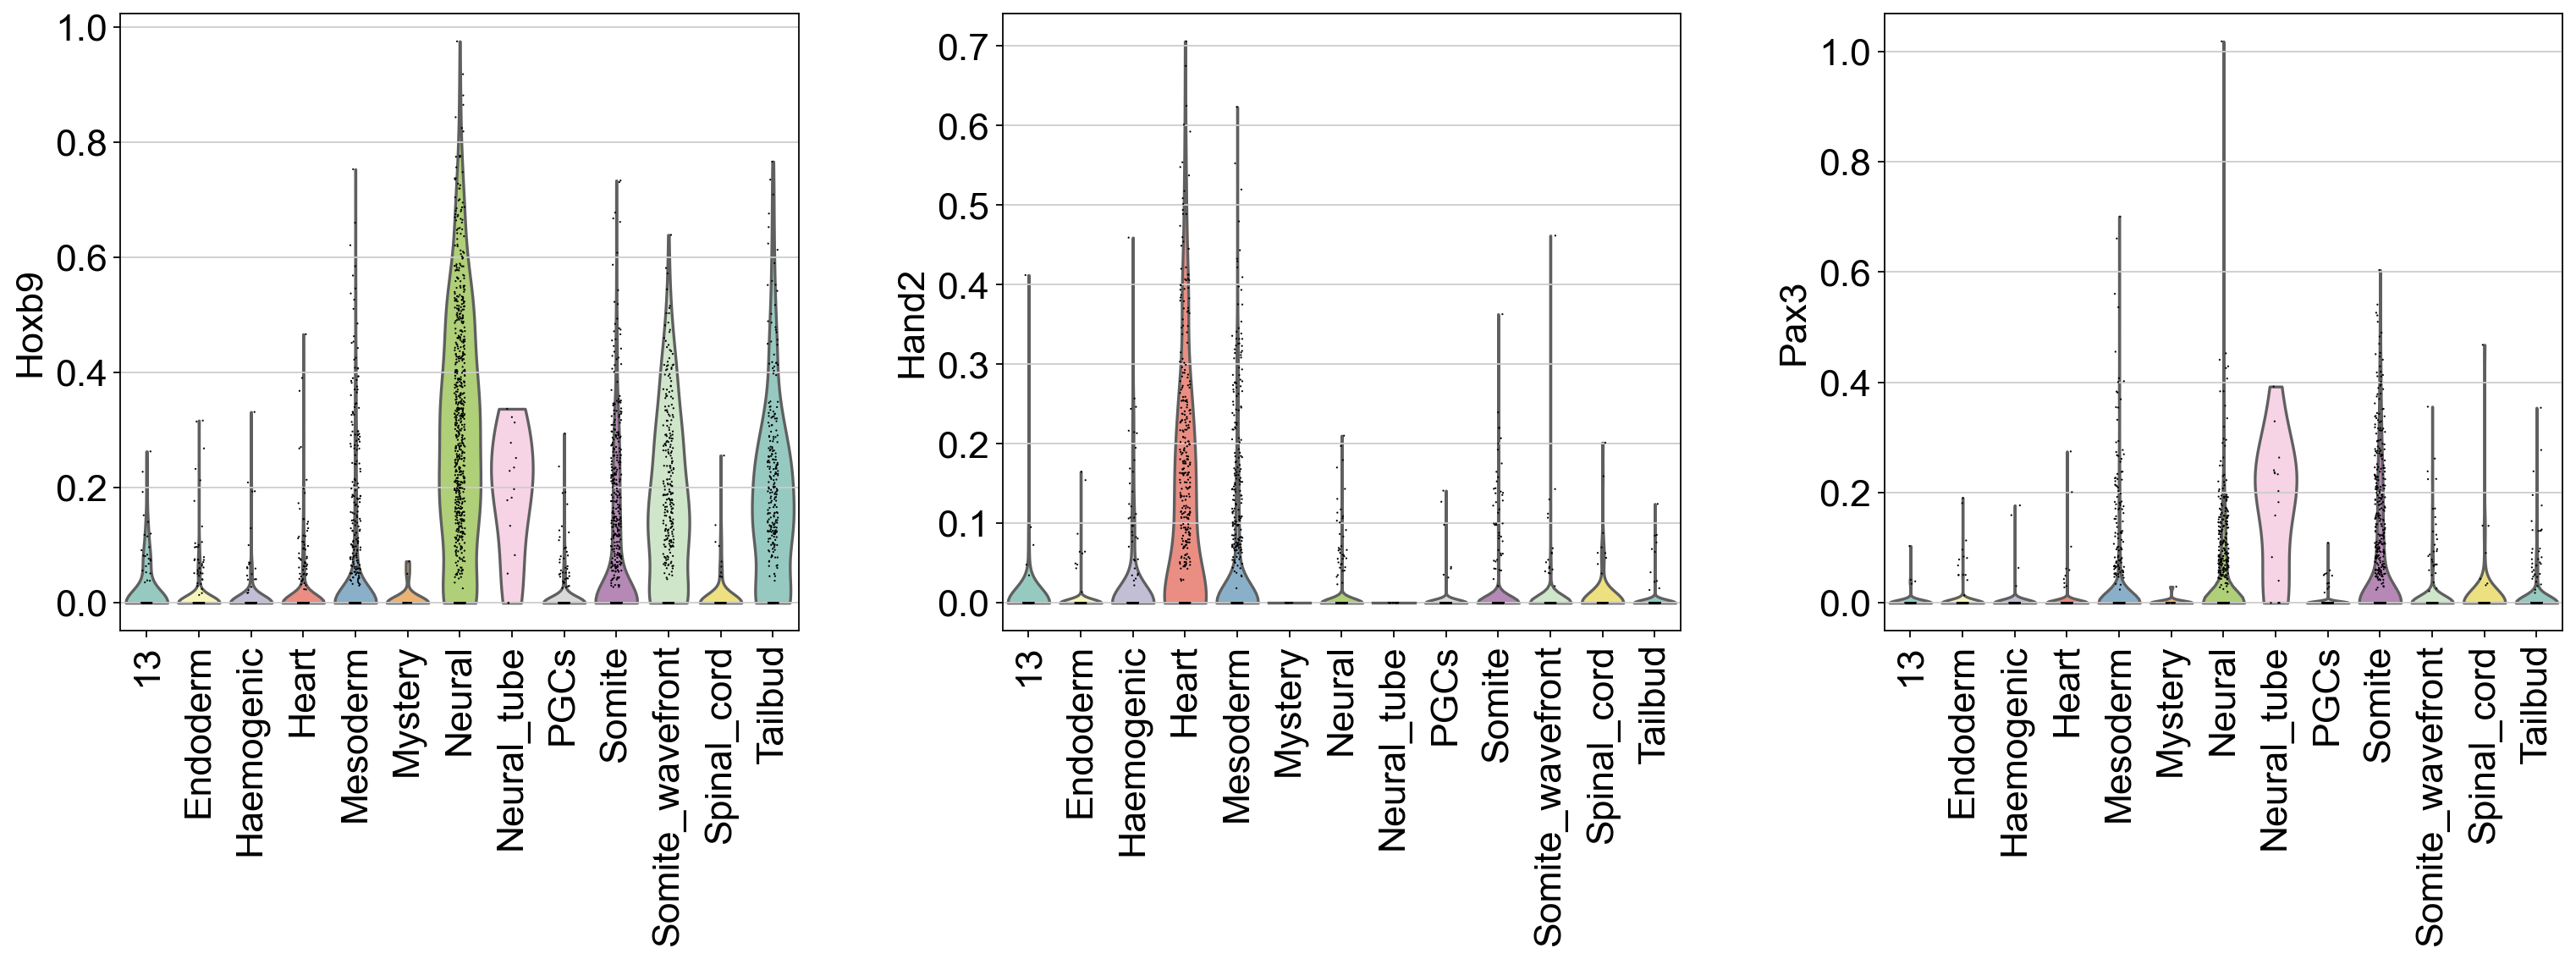

In [77]:
sc.pl.violin(adata, ['Hoxb9', 'Hand2', 'Pax3'], groupby='celltype', rotation=90)